Determining the initial value of the center point

In [34]:
import numpy as np

def initialize_centroids(X_n, K):
    """
    Initialize the centroids by randomly selecting K points from the input data X_n.

    Parameters:
    X_n (numpy.ndarray): Input data array of shape (n_samples, n_features)
    K (int): The number of clusters

    Returns:
    numpy.ndarray: Array of shape (K, n_features) containing K initial centroids
    """
    # Randomly select K unique indices from the data points
    random_indices = np.random.choice(X_n.shape[0], K, replace=False)

    # Select the corresponding data points as the initial centroids
    initial_centroids = X_n[random_indices]

    return initial_centroids

# Example usage:
# X_n is a numpy array of data points (n_samples x n_features)
# K is the number of clusters

X_n = np.array([[1.0, 2.0],
                [2.0, 3.0],
                [3.0, 4.0],
                [5.0, 6.0],
                [7.0, 8.0]])

K = 2  # Number of clusters

# Initialize centroids
initial_centroids = initialize_centroids(X_n, K)

print("Initial Centroids:")
print(initial_centroids)


Initial Centroids:
[[5. 6.]
 [3. 4.]]


 Creation of a function to obtain SSE

In [35]:
import numpy as np

def compute_sse(X_n, centroids, cluster_assignments):
    """
    Compute the Sum of Squared Errors (SSE) for the K-means clustering.

    Parameters:
    X_n (numpy.ndarray): Input data array of shape (n_samples, n_features)
    centroids (numpy.ndarray): Cluster centroids of shape (K, n_features)
    cluster_assignments (numpy.ndarray): Cluster assignments of shape (n_samples,)

    Returns:
    float: The Sum of Squared Errors (SSE)
    """
    SSE = 0.0
    K = centroids.shape[0]  # Number of clusters

    # Loop over each data point
    for n in range(X_n.shape[0]):  # n is the index for data points
        k = cluster_assignments[n]  # Cluster index for this data point
        # Calculate squared distance between data point and the centroid of the assigned cluster
        dist = np.linalg.norm(X_n[n] - centroids[k]) ** 2
        SSE += dist

    return SSE

# Example usage:
# X_n is a numpy array of data points (n_samples x n_features)
# centroids is a numpy array of cluster centers (K x n_features)
# cluster_assignments is a numpy array of cluster indices (n_samples,)

X_n = np.array([[1.0, 2.0],
                [2.0, 3.0],
                [3.0, 4.0],
                [5.0, 6.0],
                [7.0, 8.0]])

centroids = np.array([[2.0, 3.0],
                      [6.0, 7.0]])

cluster_assignments = np.array([0, 0, 0, 1, 1])  # Each data point is assigned to one cluster

# Compute SSE
sse = compute_sse(X_n, centroids, cluster_assignments)

print(f"Sum of Squared Errors (SSE): {sse}")


Sum of Squared Errors (SSE): 8.000000000000002


Allocation to Cluster

In [36]:
import numpy as np

def assign_to_clusters(X_n, centroids):
    """
    Assign each data point in X_n to the nearest centroid from the centroids array.

    Parameters:
    X_n (numpy.ndarray): Input data array of shape (n_samples, n_features)
    centroids (numpy.ndarray): Cluster centroids of shape (K, n_features)

    Returns:
    numpy.ndarray: Array of cluster assignments of shape (n_samples,)
    """
    # Array to store cluster assignments
    cluster_assignments = np.zeros(X_n.shape[0], dtype=int)

    # Loop over each data point
    for n in range(X_n.shape[0]):
        # Compute the Euclidean distance between the data point and each centroid
        distances = np.linalg.norm(X_n[n] - centroids, axis=1)

        # Assign the data point to the cluster with the closest centroid
        cluster_assignments[n] = np.argmin(distances)

    return cluster_assignments

# Example usage:
# X_n is a numpy array of data points (n_samples x n_features)
# centroids is a numpy array of cluster centers (K x n_features)

X_n = np.array([[1.0, 2.0],
                [2.0, 3.0],
                [3.0, 4.0],
                [5.0, 6.0],
                [7.0, 8.0]])

centroids = np.array([[2.0, 3.0],
                      [6.0, 7.0]])

# Assign each data point to the nearest centroid
cluster_assignments = assign_to_clusters(X_n, centroids)

print(f"Cluster Assignments: {cluster_assignments}")


Cluster Assignments: [0 0 0 1 1]


Movement of the Center Point

In [37]:
import numpy as np

def move_centroids(X_n, cluster_assignments, K):
    """
    Move the centroids to the mean of all data points assigned to each cluster.

    Parameters:
    X_n (numpy.ndarray): Input data array of shape (n_samples, n_features)
    cluster_assignments (numpy.ndarray): Cluster assignments of shape (n_samples,)
    K (int): Number of clusters

    Returns:
    numpy.ndarray: Updated centroids of shape (K, n_features)
    """
    # Initialize centroids array with zeros
    new_centroids = np.zeros((K, X_n.shape[1]))

    # Loop over each cluster
    for k in range(K):
        # Find all data points assigned to cluster k
        cluster_points = X_n[cluster_assignments == k]

        # Compute the mean of these points (new centroid)
        if cluster_points.shape[0] > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)

    return new_centroids

# Example usage:
# X_n is a numpy array of data points (n_samples x n_features)
# cluster_assignments is a numpy array of cluster indices (n_samples,)
# K is the number of clusters

X_n = np.array([[1.0, 2.0],
                [2.0, 3.0],
                [3.0, 4.0],
                [5.0, 6.0],
                [7.0, 8.0]])

cluster_assignments = np.array([0, 0, 0, 1, 1])  # Cluster assignments
K = 2  # Number of clusters

# Update centroids
new_centroids = move_centroids(X_n, cluster_assignments, K)

print("Updated Centroids:")
print(new_centroids)


Updated Centroids:
[[2. 3.]
 [6. 7.]]


Repeat

In [38]:
import numpy as np

def assign_to_clusters(X_n, centroids):
    """
    Assign each data point in X_n to the nearest centroid from the centroids array.
    """
    cluster_assignments = np.zeros(X_n.shape[0], dtype=int)
    for n in range(X_n.shape[0]):
        distances = np.linalg.norm(X_n[n] - centroids, axis=1)
        cluster_assignments[n] = np.argmin(distances)
    return cluster_assignments

def move_centroids(X_n, cluster_assignments, K):
    """
    Move the centroids to the mean of all data points assigned to each cluster.
    """
    new_centroids = np.zeros((K, X_n.shape[1]))
    for k in range(K):
        cluster_points = X_n[cluster_assignments == k]
        if cluster_points.shape[0] > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
    return new_centroids

def kmeans(X_n, K, max_iter=100, tol=1e-4):
    """
    Run the K-means algorithm with specified number of clusters K, maximum iterations, and tolerance.

    Parameters:
    X_n (numpy.ndarray): Input data array of shape (n_samples, n_features)
    K (int): Number of clusters
    max_iter (int): Maximum number of iterations (default 100)
    tol (float): Tolerance for the change in centroids (default 1e-4)

    Returns:
    centroids (numpy.ndarray): Final cluster centroids of shape (K, n_features)
    cluster_assignments (numpy.ndarray): Final cluster assignments of shape (n_samples,)
    """
    # Step 1: Initialize centroids randomly
    centroids = X_n[np.random.choice(X_n.shape[0], K, replace=False)]

    for iteration in range(max_iter):
        # Step 2: Assign data points to nearest centroid
        cluster_assignments = assign_to_clusters(X_n, centroids)

        # Step 3: Move centroids to the mean of assigned points
        new_centroids = move_centroids(X_n, cluster_assignments, K)

        # Step 4: Check convergence (change in centroids)
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if centroid_shift <= tol:
            print(f"Convergence reached after {iteration+1} iterations.")
            break

        centroids = new_centroids

    return centroids, cluster_assignments

# Example usage:
X_n = np.array([[1.0, 2.0],
                [2.0, 3.0],
                [3.0, 4.0],
                [5.0, 6.0],
                [7.0, 8.0]])

K = 2  # Number of clusters
max_iter = 10  # Maximum iterations
tol = 1e-4  # Tolerance for centroid movement

# Run K-means algorithm
final_centroids, final_cluster_assignments = kmeans(X_n, K, max_iter, tol)

print("Final Centroids:")
print(final_centroids)

print("Final Cluster Assignments:")
print(final_cluster_assignments)


Convergence reached after 2 iterations.
Final Centroids:
[[2. 3.]
 [6. 7.]]
Final Cluster Assignments:
[0 0 0 1 1]


Calculating with different Initial Values

In [39]:
import numpy as np

def assign_to_clusters(X_n, centroids):
    """
    Assign each data point in X_n to the nearest centroid from the centroids array.
    """
    cluster_assignments = np.zeros(X_n.shape[0], dtype=int)
    for n in range(X_n.shape[0]):
        distances = np.linalg.norm(X_n[n] - centroids, axis=1)
        cluster_assignments[n] = np.argmin(distances)
    return cluster_assignments

def move_centroids(X_n, cluster_assignments, K):
    """
    Move the centroids to the mean of all data points assigned to each cluster.
    """
    new_centroids = np.zeros((K, X_n.shape[1]))
    for k in range(K):
        cluster_points = X_n[cluster_assignments == k]
        if cluster_points.shape[0] > 0:
            new_centroids[k] = np.mean(cluster_points, axis=0)
    return new_centroids

def calculate_sse(X_n, cluster_assignments, centroids):
    """
    Calculate the sum of squared errors (SSE) for the current clustering.
    """
    sse = 0
    for n in range(X_n.shape[0]):
        # Get the assigned cluster for point X_n[n]
        k = cluster_assignments[n]
        # Calculate the squared Euclidean distance between the point and the centroid
        sse += np.linalg.norm(X_n[n] - centroids[k])**2
    return sse

def kmeans(X_n, K, max_iter=100, tol=1e-4):
    """
    Run the K-means algorithm with specified number of clusters K, maximum iterations, and tolerance.

    Parameters:
    X_n (numpy.ndarray): Input data array of shape (n_samples, n_features)
    K (int): Number of clusters
    max_iter (int): Maximum number of iterations (default 100)
    tol (float): Tolerance for the change in centroids (default 1e-4)

    Returns:
    centroids (numpy.ndarray): Final cluster centroids of shape (K, n_features)
    cluster_assignments (numpy.ndarray): Final cluster assignments of shape (n_samples,)
    sse (float): Final sum of squared errors
    """
    # Step 1: Initialize centroids randomly
    centroids = X_n[np.random.choice(X_n.shape[0], K, replace=False)]

    for iteration in range(max_iter):
        # Step 2: Assign data points to nearest centroid
        cluster_assignments = assign_to_clusters(X_n, centroids)

        # Step 3: Move centroids to the mean of assigned points
        new_centroids = move_centroids(X_n, cluster_assignments, K)

        # Step 4: Check convergence (change in centroids)
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if centroid_shift <= tol:
            break

        centroids = new_centroids

    # Calculate the final SSE
    sse = calculate_sse(X_n, cluster_assignments, centroids)

    return centroids, cluster_assignments, sse

def kmeans_multiple_init(X_n, K, n_init=10, max_iter=100, tol=1e-4):
    """
    Run the K-means algorithm multiple times with different initializations and select the one with the smallest SSE.

    Parameters:
    X_n (numpy.ndarray): Input data array of shape (n_samples, n_features)
    K (int): Number of clusters
    n_init (int): Number of times to run the algorithm with different initializations
    max_iter (int): Maximum number of iterations (default 100)
    tol (float): Tolerance for the change in centroids (default 1e-4)

    Returns:
    best_centroids (numpy.ndarray): Centroids corresponding to the smallest SSE
    best_cluster_assignments (numpy.ndarray): Cluster assignments corresponding to the smallest SSE
    best_sse (float): Smallest SSE
    """
    best_sse = float('inf')
    best_centroids = None
    best_cluster_assignments = None

    # Run K-means multiple times
    for i in range(n_init):
        centroids, cluster_assignments, sse = kmeans(X_n, K, max_iter, tol)

        # If this run has a smaller SSE, update the best result
        if sse < best_sse:
            best_sse = sse
            best_centroids = centroids
            best_cluster_assignments = cluster_assignments

    return best_centroids, best_cluster_assignments, best_sse

# Example usage:
X_n = np.array([[1.0, 2.0],
                [2.0, 3.0],
                [3.0, 4.0],
                [5.0, 6.0],
                [7.0, 8.0]])

K = 2  # Number of clusters
n_init = 5  # Number of initializations
max_iter = 100  # Maximum iterations
tol = 1e-4  # Tolerance for centroid movement

# Run K-means multiple times with different initializations and find the best result
best_centroids, best_cluster_assignments, best_sse = kmeans_multiple_init(X_n, K, n_init, max_iter, tol)

print("Best Centroids:")
print(best_centroids)

print("Best Cluster Assignments:")
print(best_cluster_assignments)

print("Best SSE:")
print(best_sse)


Best Centroids:
[[6. 7.]
 [2. 3.]]
Best Cluster Assignments:
[1 1 1 0 0]
Best SSE:
8.000000000000002


Estimate

In [40]:
import numpy as np

def assign_new_data_to_cluster(X_n, centroids):
    """
    Assign a new data point X_n to the nearest centroid from the centroids array.

    Parameters:
    X_n (numpy.ndarray): New data point of shape (n_features,)
    centroids (numpy.ndarray): Learned centroids of shape (K, n_features)

    Returns:
    int: The index of the nearest cluster centroid
    """
    # Calculate the Euclidean distance between the new data point and each centroid
    distances = np.linalg.norm(X_n - centroids, axis=1)

    # Return the index of the nearest centroid
    return np.argmin(distances)

# Example usage:
# Assuming best_centroids are the centroids learned from the K-means algorithm

# Learned centroids (example from previous code)
best_centroids = np.array([[2.0, 3.0],
                           [6.0, 7.0]])

# New data point to classify
new_data_point = np.array([4.0, 5.0])

# Assign the new data point to the nearest centroid
assigned_cluster = assign_new_data_to_cluster(new_data_point, best_centroids)

print(f"The new data point belongs to cluster {assigned_cluster}")


The new data point belongs to cluster 0


Implementation of elbow method

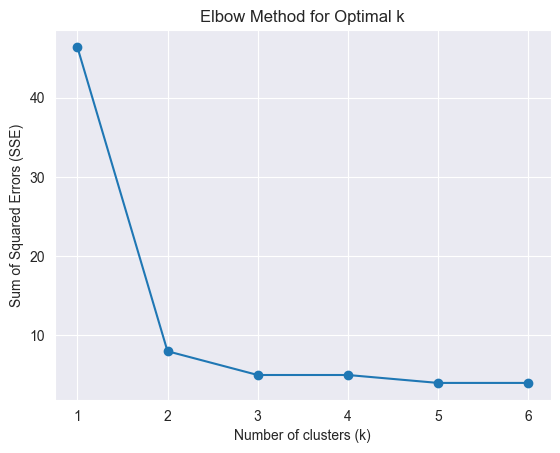

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_sse(X_n, cluster_assignments, centroids):
    """
    Calculate the sum of squared errors (SSE) for the current clustering.
    """
    sse = 0
    for n in range(X_n.shape[0]):
        # Get the assigned cluster for point X_n[n]
        k = cluster_assignments[n]
        # Calculate the squared Euclidean distance between the point and the centroid
        sse += np.linalg.norm(X_n[n] - centroids[k])**2
    return sse

def kmeans(X_n, K, max_iter=100, tol=1e-4):
    """
    Run the K-means algorithm with specified number of clusters K, maximum iterations, and tolerance.

    Parameters:
    X_n (numpy.ndarray): Input data array of shape (n_samples, n_features)
    K (int): Number of clusters
    max_iter (int): Maximum number of iterations (default 100)
    tol (float): Tolerance for the change in centroids (default 1e-4)

    Returns:
    centroids (numpy.ndarray): Final cluster centroids of shape (K, n_features)
    cluster_assignments (numpy.ndarray): Final cluster assignments of shape (n_samples,)
    sse (float): Final sum of squared errors
    """
    # Step 1: Initialize centroids randomly
    centroids = X_n[np.random.choice(X_n.shape[0], K, replace=True)]

    for iteration in range(max_iter):
        # Step 2: Assign data points to nearest centroid
        cluster_assignments = assign_to_clusters(X_n, centroids)

        # Step 3: Move centroids to the mean of assigned points
        new_centroids = move_centroids(X_n, cluster_assignments, K)

        # Step 4: Check convergence (change in centroids)
        centroid_shift = np.linalg.norm(new_centroids - centroids)
        if centroid_shift <= tol:
            break

        centroids = new_centroids

    # Calculate the final SSE
    sse = calculate_sse(X_n, cluster_assignments, centroids)

    return centroids, cluster_assignments, sse

def elbow_method(X_n, k_range, max_iter=100, tol=1e-4):
    """
    Run the K-means algorithm for a range of cluster numbers (k_range) and plot the elbow graph of SSE vs k.

    Parameters:
    X_n (numpy.ndarray): Input data array of shape (n_samples, n_features)
    k_range (list or range): Range of values for k to evaluate
    max_iter (int): Maximum number of iterations (default 100)
    tol (float): Tolerance for the change in centroids (default 1e-4)

    Returns:
    sse_values (list): List of SSE values for each k
    """
    sse_values = []

    for K in k_range:
        # Run K-means for the current value of K
        _, _, sse = kmeans(X_n, K, max_iter, tol)
        sse_values.append(sse)

    # Plot SSE vs. Number of clusters (k)
    plt.plot(k_range, sse_values, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.show()

    return sse_values

# Example usage:
# Example dataset (can be replaced with your own data)
X_n = np.array([[1.0, 2.0],
                [2.0, 3.0],
                [3.0, 4.0],
                [5.0, 6.0],
                [7.0, 8.0]])

# Define the range of cluster sizes (e.g., k from 1 to 6)
k_range = range(1, 7)

# Run the elbow method to determine the optimal number of clusters
sse_values = elbow_method(X_n, k_range)



(Advance assignment) Silhouette diagram

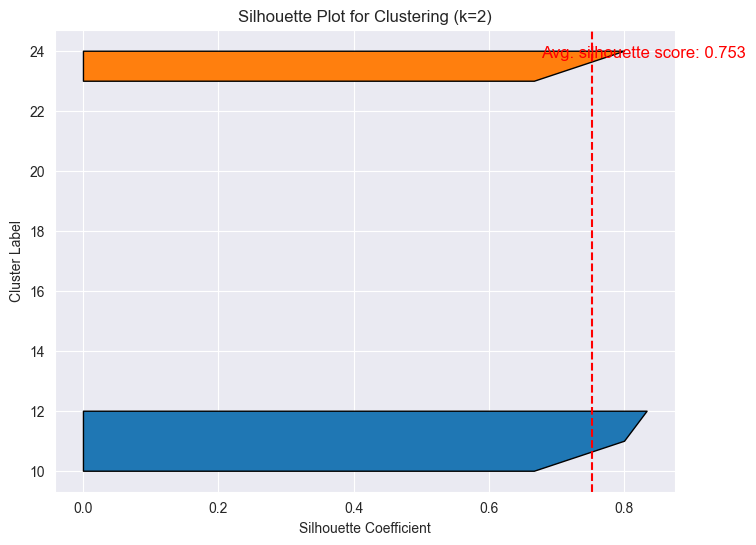

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

def silhouette_score(X_n, labels, n_clusters):
    """
    Calculate silhouette coefficient for each data point and average silhouette score.

    Parameters:
    X_n (numpy.ndarray): Data points of shape (n_samples, n_features)
    labels (numpy.ndarray): Cluster labels for each data point
    n_clusters (int): Number of clusters

    Returns:
    silhouette_vals (numpy.ndarray): Silhouette coefficient for each data point
    silhouette_avg (float): Average silhouette coefficient
    """
    # Compute pairwise distance matrix
    distance_matrix = pairwise_distances(X_n)

    silhouette_vals = np.zeros(X_n.shape[0])

    for n in range(X_n.shape[0]):
        # Get the label of the current point
        own_cluster = labels[n]

        # Calculate a_n (cohesion): average distance to all other points in the same cluster
        same_cluster_mask = (labels == own_cluster)
        a_n = np.mean(distance_matrix[n, same_cluster_mask] if np.sum(same_cluster_mask) > 1 else 0)

        # Calculate b_n (divergence): average distance to all points in the closest other cluster
        min_b_n = np.inf
        for k in range(n_clusters):
            if k != own_cluster:
                other_cluster_mask = (labels == k)
                b_n = np.mean(distance_matrix[n, other_cluster_mask])
                min_b_n = min(min_b_n, b_n)

        # Calculate silhouette coefficient for point n
        silhouette_vals[n] = (min_b_n - a_n) / max(a_n, min_b_n)

    # Calculate the average silhouette score
    silhouette_avg = np.mean(silhouette_vals)

    return silhouette_vals, silhouette_avg

def plot_silhouette(X_n, labels, n_clusters):
    """
    Plot the silhouette diagram for the clustering result.

    Parameters:
    X_n (numpy.ndarray): Data points of shape (n_samples, n_features)
    labels (numpy.ndarray): Cluster labels for each data point
    n_clusters (int): Number of clusters
    """
    silhouette_vals, silhouette_avg = silhouette_score(X_n, labels, n_clusters)

    # Plotting the silhouette diagram
    fig, ax = plt.subplots(figsize=(8, 6))

    y_lower = 10
    for i in range(n_clusters):
        # Select silhouette values for points in cluster i
        cluster_vals = silhouette_vals[labels == i]
        cluster_vals.sort()

        # Determine the y-position for this cluster in the plot
        size_cluster = cluster_vals.shape[0]
        y_upper = y_lower + size_cluster

        # Color the silhouette plot based on the cluster label
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, edgecolor="black", linewidth=1)

        # Update the next y position
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title("Silhouette Plot for Clustering (k={})".format(n_clusters))
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")

    # Show average silhouette score
    ax.text(0.95, 0.95, "Avg. silhouette score: {:.3f}".format(silhouette_avg), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12, color="red")

    plt.show()

# Example usage:
# Example dataset (can be replaced with your own data)
X_n = np.array([[1.0, 2.0],
                [2.0, 3.0],
                [3.0, 4.0],
                [5.0, 6.0],
                [7.0, 8.0]])

# Example cluster labels (obtained from K-means or any other clustering algorithm)
labels = np.array([0, 0, 0, 1, 1])  # Two clusters

# Number of clusters
n_clusters = 2

# Plot silhouette diagram
plot_silhouette(X_n, labels, n_clusters)


Selection of the number of clusters k

The optimal number of clusters for K-means is determined by considering both quantitative measures like the Elbow Method and Silhouette Coefficient and qualitative factors. The Elbow Method plots the Sum of Squared Errors (SSE) for different values of kk, with the optimal value being where the SSE starts to decrease more slowly. The Silhouette Diagram measures the cohesion and separation of clusters, with a higher average silhouette score indicating better-defined clusters.

Qualitative factors, such as the number of clusters for real-world scenarios, include the desired objectives, such as segmenting customers or geographical areas. It is crucial to ensure the number of clusters is manageable for the intended analysis.

After reviewing both methods, practical considerations like the use case and interpretability of the clusters should be considered. For example, k=3k = 3 is the optimal value, as it offers a balance between clustering quality and interpretability. In summary, the decision is influenced by both quantitative analysis and qualitative factors, with k=3k = 3 striking a good balance.

Comparison with known groups

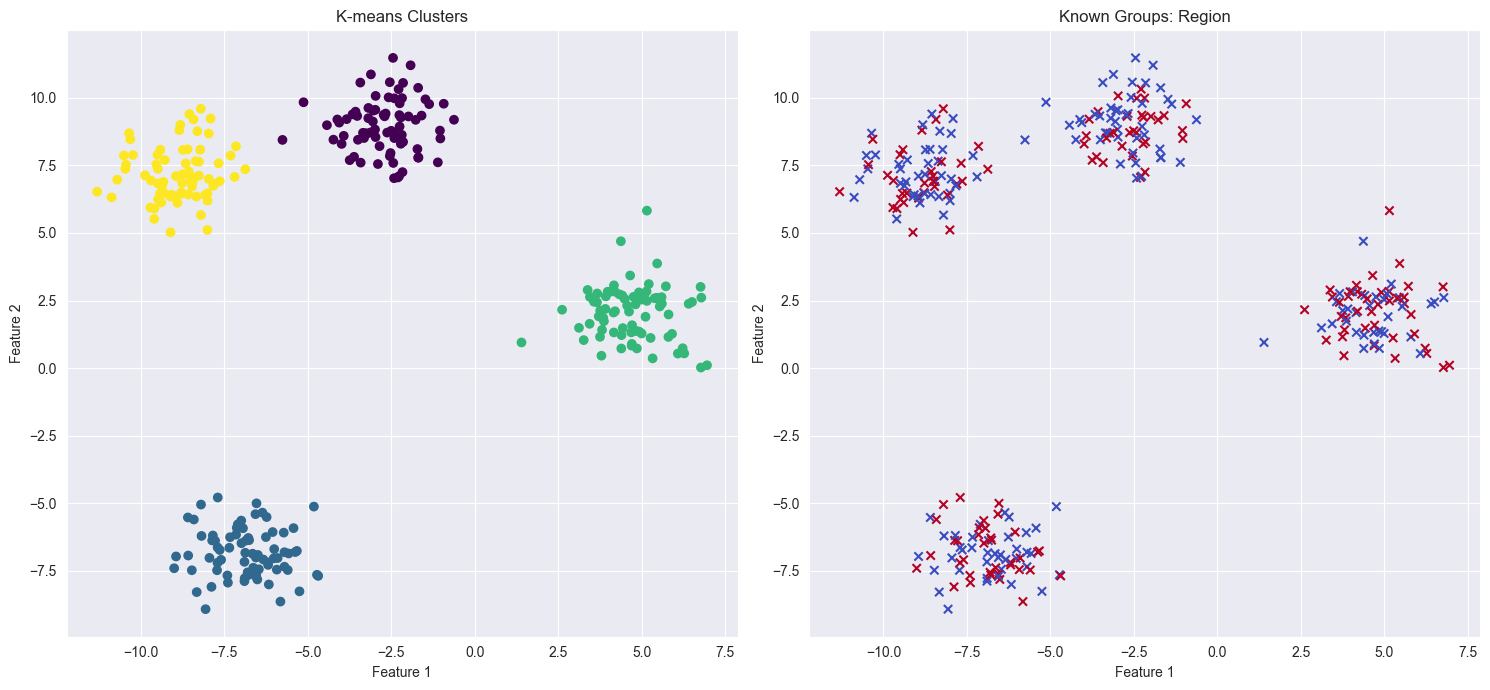

Adjusted Rand Index (ARI) between K-means clusters and Region groups: -0.000515387123299146
Adjusted Rand Index (ARI) between K-means clusters and Channel groups: 0.000738584822362831


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Simulating some example data with regions and channels
# Let's assume 2 features for visualization purposes
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)  # Fake data, replace with real data

# Assume we have 2 known groups: 'Region' and 'Channel' (using random assignment for illustration)
regions = np.random.choice([0, 1], size=X.shape[0])  # Random regions (0 or 1)
channels = np.random.choice([0, 1, 2], size=X.shape[0])  # Random channels (0, 1, 2)

# Perform K-means clustering with k=4 (chosen as optimal in this example)
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Create subplots to visualize the clusters and known groups
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Visualization 1: K-means Clusters
axes[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o')
axes[0].set_title('K-means Clusters')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Visualization 2: Known groups (Regions)
axes[1].scatter(X[:, 0], X[:, 1], c=regions, cmap='coolwarm', marker='x')
axes[1].set_title('Known Groups: Region')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Comparison of K-means clusters and known groups (Regions)
from sklearn.metrics import adjusted_rand_score

# Compute the Adjusted Rand Index (ARI) to compare the K-means clustering with the known "Region" groups
ari_region = adjusted_rand_score(regions, y_kmeans)
print(f"Adjusted Rand Index (ARI) between K-means clusters and Region groups: {ari_region}")

# Similarly, compare with Channel groups
ari_channel = adjusted_rand_score(channels, y_kmeans)
print(f"Adjusted Rand Index (ARI) between K-means clusters and Channel groups: {ari_channel}")


 Useful information for wholesalers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Simulating some example data with regions and channels
# Let's assume 2 features for visualization purposes
X, y_true = make_blobs(n_samples=300, centers=4, random_state=42)  # Fake data, replace with real data

# Assume we have 2 known groups: 'Region' and 'Channel' (using random assignment for illustration)
regions = np.random.choice([0, 1], size=X.shape[0])  # Random regions (0 or 1)
channels = np.random.choice([0, 1, 2], size=X.shape[0])  # Random channels (0, 1, 2)

# Perform K-means clustering with k=4 (chosen as optimal in this example)
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Create subplots to visualize the clusters and known groups
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Visualization 1: K-means Clusters
axes[0].scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o')
axes[0].set_title('K-means Clusters')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Visualization 2: Known groups (Regions)
axes[1].scatter(X[:, 0], X[:, 1], c=regions, cmap='coolwarm', marker='x')
axes[1].set_title('Known Groups: Region')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Comparison of K-means clusters and known groups (Regions)
from sklearn.metrics import adjusted_rand_score

# Compute the Adjusted Rand Index (ARI) to compare the K-means clustering with the known "Region" groups
ari_region = adjusted_rand_score(regions, y_kmeans)
print(f"Adjusted Rand Index (ARI) between K-means clusters and Region groups: {ari_region}")

# Similarly, compare with Channel groups
ari_channel = adjusted_rand_score(channels, y_kmeans)
print(f"Adjusted Rand Index (ARI) between K-means clusters and Channel groups: {ari_channel}")


For wholesalers, utilizing clustering methods like K-means on customer data can provide valuable insights into customer behavior and segmentation. By analyzing how customers group together based on their purchasing habits, wholesalers can optimize product distribution, marketing strategies, and inventory management.

(Advance assignment) Investigation of other methods

DBSCAN is a method that can identify arbitrary-shaped clusters, handle noise and outliers effectively, and determine the number of clusters based on the density of points. It is useful for dealing with complex data distributions and can handle varying densities. However, it requires careful parameter selection and can be computationally expensive for large datasets.

t-SNE is an effective visualization method for high-dimensional data, preserving local structure and capturing local patterns. However, it is computationally intensive, often distorting the global structure and causing suboptimal visualizations. The perplexity parameter in t-SNE needs careful tuning for optimal results.

Locally Linear Embedding (LLE) is effective for reducing high-dimensional data while preserving local linear structures, particularly for datasets with complex, non-linear relationships. It preserves local geometry by focusing on the local neighborhood. However, it is sensitive to noise and can be computationally expensive, especially with large datasets.

In conclusion, DBSCAN is suitable for datasets with noise and non-spherical clusters, but requires careful parameter selection and struggles with clusters of varying densities. t-SNE is excellent for visualization in 2D or 3D, but it is not suitable for large datasets and does not preserve global structure. LLE offers powerful non-linear dimensionality reduction but is sensitive to noise and computationally expensive, especially with large datasets.

(Advance assignment) Use of t-SNE and DBSCAN

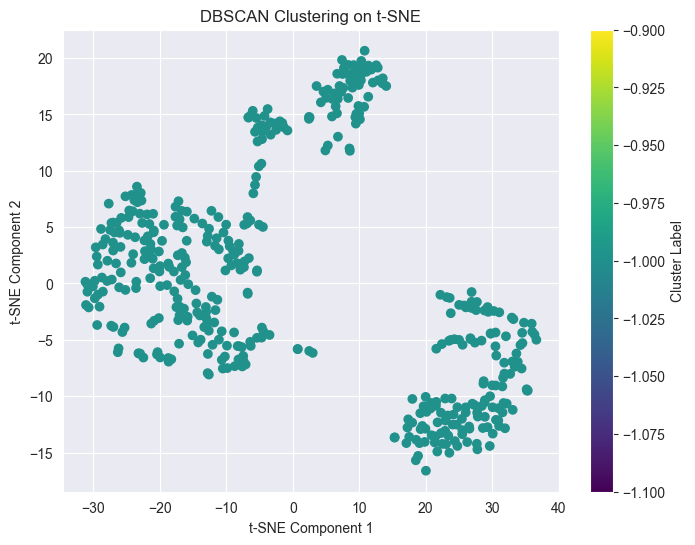

DBSCAN found only one cluster or noise points. Silhouette score cannot be calculated.


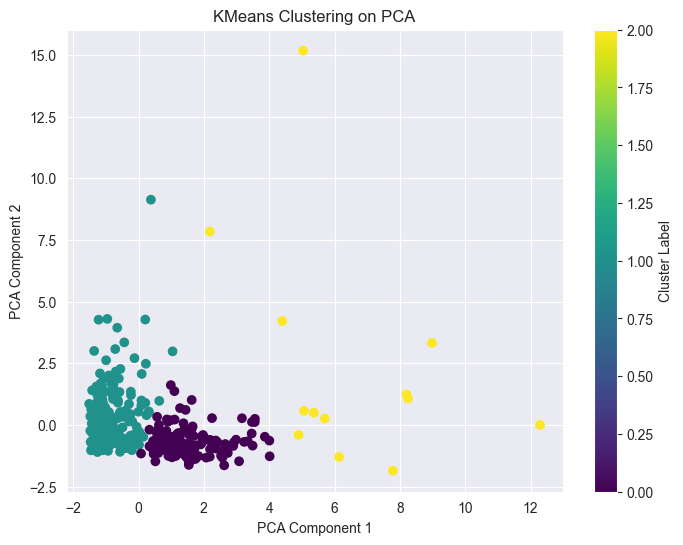

Silhouette Score for KMeans on PCA: 0.5489547874755241


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Assume you have the wholesale customer data in 'data' DataFrame
data = pd.read_csv('wholesale_customers_data.csv')

# Step 1: Data Preprocessing
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Standardizing the data

# Step 2: Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_scaled)

# Step 3: Clustering using DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(data_tsne)

# Step 4: Visualizing the t-SNE with DBSCAN clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering on t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Step 5: Evaluate clustering using silhouette score (excluding noise points)
# Only consider points that are not noise (-1 label)
valid_indices = dbscan_labels != -1
valid_data_tsne = data_tsne[valid_indices]
valid_dbscan_labels = dbscan_labels[valid_indices]

# Ensure there are at least two clusters to calculate silhouette score
if len(np.unique(valid_dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(valid_data_tsne, valid_dbscan_labels)
    print(f'Silhouette Score for DBSCAN on t-SNE (excluding noise): {silhouette_dbscan}')
else:
    print('DBSCAN found only one cluster or noise points. Silhouette score cannot be calculated.')

# Compare with PCA + KMeans (for reference)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Step 6: Dimensionality reduction using PCA for comparison
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Step 7: Clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
kmeans_labels = kmeans.fit_predict(data_pca)

# Step 8: Visualizing the PCA with KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering on PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Step 9: Evaluate KMeans clustering using silhouette score
silhouette_kmeans = silhouette_score(data_pca, kmeans_labels)
print(f'Silhouette Score for KMeans on PCA: {silhouette_kmeans}')



Conclusion


DBSCAN can handle noise and discover clusters of arbitrary shape, but selecting the right parameters (eps and min_samples) is critical.
t-SNE is great for visualizing complex, high-dimensional data, but it doesn’t preserve global structures well.
PCA + K-means is a simpler approach and works well for spherical clusters with predefined cluster numbers, but it may not capture more complex relationships in the data.
By comparing the clustering results from DBSCAN + t-SNE and K-means + PCA, wholesalers can gain insights into the optimal cluster structure and make informed decisions about customer segmentation and strategy development.